In [6]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from scripts.gestion_donnees.pretraitement import Pretraitement
from scripts.evaluation.evaluation_model import Evaluation
from scripts.classifieurs.forets_aleatoires import Forets_aleatoires
#import sys
#sys.path.insert(1,'C:\\Users\\mazen\\OneDrive\\Bureau\\Projet_IFT712\\src\\scripts\\evaluation')
#import evaluation_model
#evaluation_model.Evaluation.matrice_confusion()
from sklearn.ensemble import RandomForestClassifier


## Partie 1 :  Prétraitement et analyse des données

In [7]:
# creation des instances
Ev = Evaluation
Pt = Pretraitement("./data/train.csv")
#  charger donneés entrainement
df_train_init = Pt.Charger_donnees()
# encoder donneés
etiquette,classes = Pt.Encoder_donnees(df_train_init,"species")
df_train_init = df_train_init.drop(['id','species'], axis=1)
# supprimer les valeurs aberrantes
outliers = Pt.Indice_outliers(df_train_init,3.0)
df_train = df_train_init.drop(outliers)
etiquette = [etiquette[i] for i in range(len(etiquette)) if i not in outliers]
# diviser les donnees
x_train, x_test, y_train, y_test, x_val, y_val = Pt.Diviser_donnees(df_train,etiquette)


In [8]:
#vérifie la redondance des datas
print("Le nombre de données redondantes de train est " + str(df_train.duplicated().sum()))
#vérifie si pour un des attributs il manque une valeur
print("Nb valeur manquante train " + str(df_train.isnull().any().sum()))

Le nombre de données redondantes de train est 0
Nb valeur manquante train 0


## Partie 2 : Modélisation et évaluation des données

##### Forets aléatoires

In [9]:
model_foret_alea = Forets_aleatoires(x_train, y_train, x_val, y_val,x_test,y_test)
model_foret_alea.garder_meilleur_hyperparameters()
model_foret_alea.entrainement()
predictions = model_foret_alea.prediction()
model_foret_alea.resultats_model()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
   

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

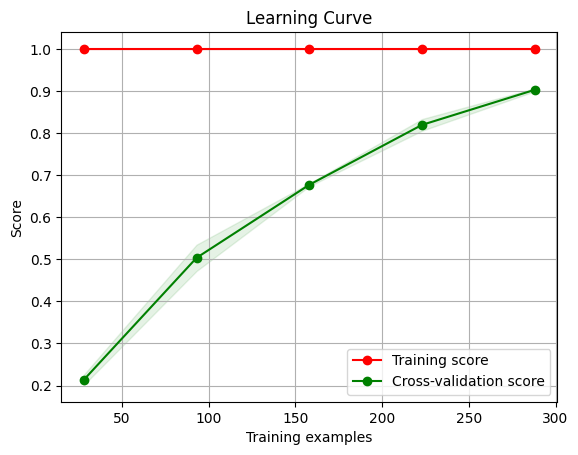

In [11]:
model_foret_alea.plot_learning_curve()